In [6]:
# Importing Libraries
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
# Define the LeNet-5 model architecture again
lenet_5_loaded = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, kernel_size=5),
    torch.nn.Tanh(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),
    
    torch.nn.Conv2d(6, 16, kernel_size=5),
    torch.nn.Tanh(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),
    
    torch.nn.Flatten(),
    torch.nn.Linear(5*5*16, 120),
    torch.nn.Tanh(),
    torch.nn.Linear(120, 84),
    torch.nn.Tanh(),
    torch.nn.Linear(84, 10)
)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lenet_5_loaded.to(device)

# Load the saved state dict
lenet_5_loaded.load_state_dict(torch.load('models/lenet5_mnist.pth', map_location=device))
lenet_5_loaded.eval()  # Set to evaluation mode

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Tanh()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Tanh()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

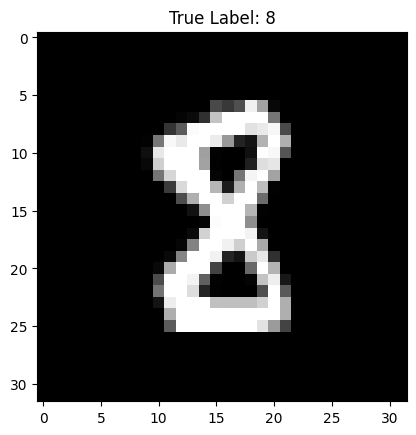

In [7]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor()
])

# Load a sample image from the test dataset
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
sample_img, label = test_dataset[179]

plt.imshow(sample_img.squeeze(), cmap='gray')
plt.title(f'True Label: {label}')
plt.show()

In [8]:
# Predict
with torch.no_grad():
    sample_img = sample_img.unsqueeze(0).to(device)
    output = lenet_5_loaded(sample_img)
    prob = torch.nn.functional.softmax(output, dim=1)
    print(f"Softmax Probabilities: {prob.cpu().numpy()}")
    print(f"Predicted Digit: {torch.argmax(prob).item()}")

Softmax Probabilities: [[3.2994234e-05 1.8448685e-03 7.0555792e-03 5.3113647e-04 1.9532811e-06
  4.6566263e-05 4.2799511e-05 5.4479992e-06 9.9042165e-01 1.6884092e-05]]
Predicted Digit: 8


<hr>